In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pwd

'/home/tello/Documentos'

In [3]:
cd ..

/home/tello


In [4]:
cd Descargas

/home/tello/Descargas


In [5]:
leche = pd.read_csv('produccion-leche.csv', index_col='Month')

In [6]:
leche.head()

,Milk Production
Month,
1962-01-01 01:00:00,589.0
1962-02-01 01:00:00,561.0
1962-03-01 01:00:00,640.0
1962-04-01 01:00:00,656.0
1962-05-01 01:00:00,727.0


In [7]:
leche.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168 entries, 1962-01-01 01:00:00 to 1975-12-01 01:00:00
Data columns (total 1 columns):
Milk Production    168 non-null float64
dtypes: float64(1)
memory usage: 2.6+ KB


In [8]:
leche.index = pd.to_datetime(leche.index)

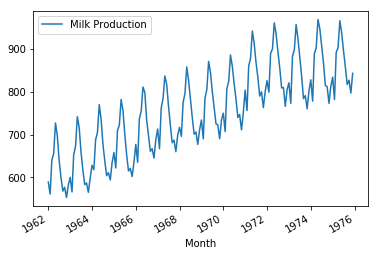

In [9]:
leche.plot()

In [10]:
conjunto_entrenamiento = leche.head(150)
conjunto_pruebas = leche.tail(18)

In [12]:
conjunto_pruebas

,Milk Production
Month,
1974-07-01 01:00:00,908.0
1974-08-01 01:00:00,867.0
1974-09-01 01:00:00,815.0
1974-10-01 01:00:00,812.0
1974-11-01 01:00:00,773.0
1974-12-01 01:00:00,813.0
1975-01-01 01:00:00,834.0
1975-02-01 01:00:00,782.0
1975-03-01 01:00:00,892.0


In [14]:
from sklearn.preprocessing import MinMaxScaler
normalizacion = MinMaxScaler()
entrenamiento_normalizado = normalizacion.fit_transform(conjunto_entrenamiento)
pruebas_normalizado = normalizacion.transform(conjunto_pruebas)

In [16]:
pruebas_normalizado

array([[0.85336538],
       [0.75480769],
       [0.62980769],
       [0.62259615],
       [0.52884615],
       [0.625     ],
       [0.67548077],
       [0.55048077],
       [0.81490385],
       [0.84134615],
       [0.99278846],
       [0.92307692],
       [0.82451923],
       [0.73317308],
       [0.63461538],
       [0.65865385],
       [0.58653846],
       [0.69711538]])

In [17]:
def lotes(datos_entrenamiento, tamaño_lote, pasos):
    comienzo = np.random.randint(0, len(datos_entrenamiento) - pasos)
    lote_y  = np.array(datos_entrenamiento[comienzo:comienzo+pasos+1]).reshape(1,pasos+1)
    return lote_y[:,:-1].reshape(-1,pasos,1), lote_y[:,1:].reshape(-1,pasos,1)

In [18]:
numero_entradas = 1
numero_pasos = 18
numero_neuronas = 120
numero_salidas = 1
tasa_aprendizaje = 0.001
numero_iteraciones_entrenamiento = 5000
tamaño_lote = 1

In [19]:
x = tf.placeholder(tf.float32, [None, numero_pasos, numero_entradas])
y = tf.placeholder(tf.float32, [None, numero_pasos, numero_salidas])

In [22]:
capa = tf.contrib.rnn.OutputProjectionWrapper(tf.contrib.rnn.BasicLSTMCell(num_units=numero_neuronas, activation=tf.nn.relu), output_size=numero_salidas)

In [24]:
salidas, estados = tf.nn.dynamic_rnn(capa, x, dtype=tf.float32)

In [25]:
funcion_error = tf.reduce_mean(tf.square(salidas-y))
optimizador = tf.train.AdamOptimizer(learning_rate=tasa_aprendizaje)
entrenamiento = optimizador.minimize(funcion_error)

In [27]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [28]:
with tf.Session() as sesion:
    sesion.run(init)
    for iteracion in range(numero_iteraciones_entrenamiento):
        lote_X, lote_Y = lotes(entrenamiento_normalizado,tamaño_lote, numero_pasos)
        sesion.run(entrenamiento, feed_dict={x:lote_X, y:lote_Y})
        if iteracion %100 == 0:
            error = funcion_error.eval(feed_dict={x:lote_X, y:lote_Y})
            print(iteracion,"\t Error ", error)
        saver.save(sesion, "./modelo_series_temporales")

0 	 Error  0.58496135
100 	 Error  0.04823663
200 	 Error  0.04380449
300 	 Error  0.030718936
400 	 Error  0.008362114
500 	 Error  0.007945314
600 	 Error  0.00751765
700 	 Error  0.0071877167
800 	 Error  0.0132014025
900 	 Error  0.012686372
1000 	 Error  0.0066598323
1100 	 Error  0.009301556
1200 	 Error  0.0076751327
1300 	 Error  0.004599501
1400 	 Error  0.006217185
1500 	 Error  0.005524924
1600 	 Error  0.007392285
1700 	 Error  0.0054525156
1800 	 Error  0.0054901047
1900 	 Error  0.004619831
2000 	 Error  0.00391418
2100 	 Error  0.005665315
2200 	 Error  0.0044241147
2300 	 Error  0.0052283634
2400 	 Error  0.0037727293
2500 	 Error  0.0041859
2600 	 Error  0.004555437
2700 	 Error  0.003163926
2800 	 Error  0.005906209
2900 	 Error  0.006684144
3000 	 Error  0.004003722
3100 	 Error  0.0043399143
3200 	 Error  0.003640547
3300 	 Error  0.0039968695
3400 	 Error  0.0019998455
3500 	 Error  0.0037429023
3600 	 Error  0.0021102447
3700 	 Error  0.004078376
3800 	 Error  0.0

In [31]:
with tf.Session() as sesion:
    saver.restore(sesion, "./modelo_series_temporales")
    entrenamiento_seed = list(entrenamiento_normalizado[-18:])
    for iteracion in range(18):
        lote_X = np.array(entrenamiento_seed[-numero_pasos:]).reshape(1,numero_pasos,1)
        prediccion_y = sesion.run(salidas, feed_dict={x:lote_X})
        entrenamiento_seed.append(prediccion_y[0,-1,0])

INFO:tensorflow:Restoring parameters from ./modelo_series_temporales


In [32]:
resultados = normalizacion.inverse_transform(np.array(entrenamiento_seed[18:]).reshape(18,1))

In [33]:
resultados

array([[ 929.58105],
       [ 899.76105],
       [ 871.74713],
       [ 866.1682 ],
       [ 856.7743 ],
       [ 871.3445 ],
       [ 893.1916 ],
       [ 907.7567 ],
       [ 946.8859 ],
       [1024.358  ],
       [1026.7957 ],
       [1015.585  ],
       [ 984.0743 ],
       [ 950.6247 ],
       [ 930.73114],
       [ 923.16943],
       [ 913.1973 ],
       [ 931.5806 ]], dtype=float32)

In [35]:
conjunto_pruebas['Predicciones'] = resultados

/home/tello/anaconda3/envs/pruebastensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
conjunto_pruebas

,Milk Production,Predicciones
Month,,
1974-07-01 01:00:00,908.0,929.581055
1974-08-01 01:00:00,867.0,899.761047
1974-09-01 01:00:00,815.0,871.747131
1974-10-01 01:00:00,812.0,866.168213
1974-11-01 01:00:00,773.0,856.774292
1974-12-01 01:00:00,813.0,871.344482
1975-01-01 01:00:00,834.0,893.191589
1975-02-01 01:00:00,782.0,907.756714
1975-03-01 01:00:00,892.0,946.885925


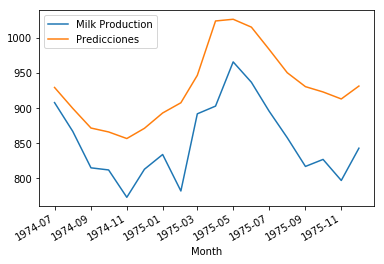

In [37]:
conjunto_pruebas.plot()